In [6]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [7]:
df = pd.read_csv('wsb_comments_sentiment.csv')

In [8]:
# NLTK splits the Reddit titles into separate sentences
import nltk

In [9]:
# List to hold the sentences
s_list = []
# List to hold the IDs. Keeps track of individual posts, just in case it's needed later
id_list = []

for title in df['title']:
    id = df['id']
    a_list = nltk.tokenize.sent_tokenize(title)
    for sentence in a_list:
        id_list.append(id)
        s_list.append(sentence)
        

In [10]:
# https://pypi.org/project/NRCLex/
# NCRLex uses a 27,000 word library to predict emotions of the sentences

from nrclex import NRCLex

In [11]:
# Create a list to hold the NRCLex objects
emotions = []

# Create NRCLex objects out of each sentence
for sentence in s_list:
    emo = NRCLex(sentence)
    emotions.append(emo)

In [12]:
# NRCLex determined that some of the results were completely neutral
# To clean out the results from neutral results, create a new list
# This is done by adding the values for each emotion, and if >0, add to new list
emo2 = []

for i in emotions:
    val = 0
    for key in i.affect_frequencies:
        val += i.affect_frequencies[key]
    if (val != 0):
        emo2.append(i)

In [13]:
# The PyPlutchik library can only handle certain emotions:
# (joy, trust, fear, suprise, sadness, disgust, anger, anticipation)
# NCRLex has 3 additional ones (anticip, postitive, and negative)
# To use the PyPlutchik visualization, they are removed below

for sentence in emo2:
    if 'anticip' in sentence.affect_frequencies:
        del sentence.affect_frequencies['anticip']
    if 'positive' in sentence.affect_frequencies:
        del sentence.affect_frequencies['positive']
    if 'negative' in sentence.affect_frequencies:
        del sentence.affect_frequencies['negative']  

In [14]:
# https://github.com/alfonsosemeraro/pyplutchik
# Visualization tool based on Plutchik's Model of Emotions (flower)

from pyplutchik import plutchik

In [16]:
# Averaging out the average emotional value across all posts

# Stores to total number of posts
count = 0

# First used to store the total value of each emotional value
# Then calculate the 
avg_joy = 0.0
avg_trust = 0.0
avg_fear = 0.0
avg_supr = 0.0
avg_sad = 0.0
avg_disg = 0.0
avg_ang = 0.0
avg_ant = 0.0

In [17]:
for sentence in emo2:
    count += 1
    for key in sentence.affect_frequencies:
        if key == 'joy':
            avg_joy += sentence.affect_frequencies[key]
        elif key == 'trust':
            avg_trust += sentence.affect_frequencies[key]
        elif key == 'fear':
            avg_fear += sentence.affect_frequencies[key]
        elif key == 'surpise':
            avg_supr += sentence.affect_frequencies[key]
        elif key == 'sadness':
            avg_sad += sentence.affect_frequencies[key]
        elif key == 'disgust':
            avg_disg += sentence.affect_frequencies[key]
        elif key == 'anger':
            avg_ang += sentence.affect_frequencies[key]
        elif key == 'anticipation':
            avg_ant += sentence.affect_frequencies[key]
            
test = {'joy': avg_joy/count,
            'trust': avg_trust/count,
            'fear': avg_fear/count,
            'surprise': avg_supr/count,
            'sadness': avg_sad/count,
            'disgust': avg_disg/count,
            'anger': avg_ang/count,
            'anticipation': avg_ant/count}

C:\Users\guest1\anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\guest1\anaconda3\lib\site-packages\pyplutchik\pyplutchik.py:770: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s = emotion, xy = p4, rotation = angle2, ha='center', va = 'center',
C:\Users\guest1\anaconda3\lib\site-packages\pyplutchik\pyplutchik.py:775: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s = "{0:.2f}".format(round(emotion_score,2)), xy = p5, rotation = angle2, ha='center', va = 'center',


<AxesSubplot:>

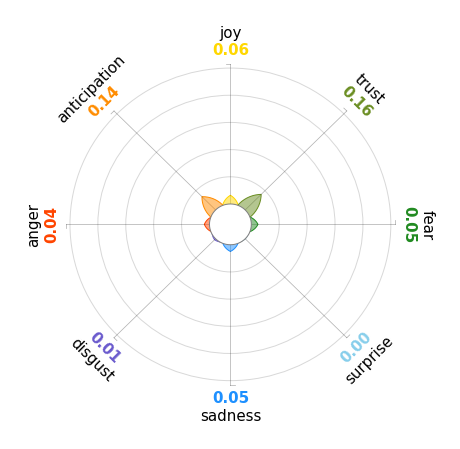

In [18]:
plutchik(test)

In [19]:
# Average measure of intensity of emotion

avg_joy = 0.0
avg_trust = 0.0
avg_fear = 0.0
avg_supr = 0.0
avg_sad = 0.0
avg_disg = 0.0
avg_ang = 0.0
avg_ant = 0.0

joyct = 0
trustct = 0
fearct = 0
suprct = 0
sadct = 0
disgct = 0
angct = 0
antct = 0

In [20]:
for sentence in emo2:
    count += 1
    for key in sentence.affect_frequencies:
        if key == 'joy' and sentence.affect_frequencies['joy'] != 0.0:
            joyct += 1
            avg_joy += sentence.affect_frequencies[key]
        elif key == 'trust'and sentence.affect_frequencies['trust'] != 0.0:
            avg_trust += sentence.affect_frequencies[key]
            trustct += 1
        elif key == 'fear'and sentence.affect_frequencies['fear'] != 0.0:
            avg_fear += sentence.affect_frequencies[key]
            fearct += 1
        elif key == 'surpise'and sentence.affect_frequencies['surpise'] != 0.0:
            avg_supr += sentence.affect_frequencies[key]
            suprct += 1
        elif key == 'sadness'and sentence.affect_frequencies['sadness'] != 0.0:
            avg_sad += sentence.affect_frequencies[key]
            sadct += 1
        elif key == 'disgust'and sentence.affect_frequencies['disgust'] != 0.0:
            avg_disg += sentence.affect_frequencies[key]
            disgct += 1
        elif key == 'anger'and sentence.affect_frequencies['anger'] != 0.0:
            avg_ang += sentence.affect_frequencies[key]
            angct += 1
        elif key == 'anticipation'and sentence.affect_frequencies['anticipation'] != 0.0:
            avg_ant += sentence.affect_frequencies[key]
            antct += 1

test = {'joy': avg_joy/joyct,
            'trust': avg_trust/trustct,
            'fear': avg_fear/fearct,
            'surprise': avg_supr,
            'sadness': avg_sad/sadct,
            'disgust': avg_disg/disgct,
            'anger': avg_ang/angct,
            'anticipation': avg_ant/antct}

<AxesSubplot:>

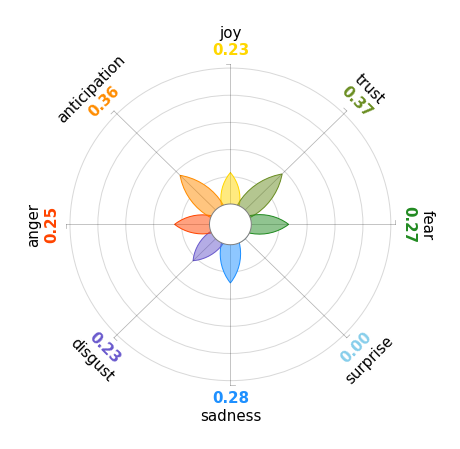

In [21]:
plutchik(test)